# Project 1

In [1]:
import torch
import numpy as np
from matplotlib import pyplot as plt

from banana_env import make_banana_env
from run import train
from agent import Agent

In [2]:
with make_banana_env() as env:
    brain_name = env.brain_names[0]
    brain = env.brains[brain_name]

    env_info = env.reset()[brain_name]
    action_size = brain.vector_action_space_size
    state = env_info.vector_observations[0]
    state_size = len(state)

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    agent = Agent(
        device,
        state_size,
        action_size,
        buffer_size=int(1e5),
        batch_size=64,
        learning_rate=5e-4,
        discount_rate=0.99,
        eps_decay=0.995,
        tau=1e-3,
        steps_per_update=4
    )

    scores = train(env, agent, brain_name, max_eps=int(2e5), min_score=14.0)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


100 - 1.1
200 - 5.09
300 - 6.44
400 - 10.51
500 - 12.21
600 - 14.43


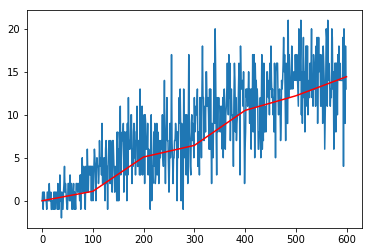

In [4]:
avg_scores = np.zeros(len(scores) // 100 + 1)
avg_scores[1:] = np.array(scores).reshape(-1, 100).mean(axis=1)
plt.plot(scores)
plt.plot(np.arange(avg_scores.shape[0]) * 100, avg_scores, 'r-')